# Flexibility Assessment

In the realm of sports, particularly disciplines like pole dance, flexibility is a key component of performance. This notebook is an endeavor to analyze and enhance the flexibility of athletes through a systematic approach. Inspired by the principles outlined in "Stretching Scientifically: A Guide to Flexibility Training," we focus on quantifying the range of motion in various joints during pole dance poses. This methodology not only aids in tracking improvements in flexibility but also helps in understanding the nuances of different types of flexibility: dynamic, active, and passive.

- Dynamic Flexibility refers to the ability to perform dynamic movements within a full range of motion in the joints. This type of flexibility is crucial for movements that involve momentum and speed.

- Active Flexibility is the ability to hold a position using only the strength of the agonist muscles. It's a measure of how well one can extend or flex a joint without external assistance, reflecting the control and strength in the muscle groups.

- Passive Flexibility, on the other hand, is the ability to hold a pose with the help of external forces or weight, like gravity or a partner. This type of flexibility often exceeds active flexibility and is indicative of the total extensibility of muscles and connective tissues.

**Selected Poses for Flexibility Assessment**

Our assessment includes key poses that challenge and reveal different aspects of flexibility:

1. Front and Middle Splits: These poses primarily measure the range of motion in the hips and groin area, crucial for many pole dance moves.
2. Backbend Flexibility: This evaluates the spinal and shoulder flexibility, essential for fluidity and grace in performance.
3. Front Pike Flexibility: It assesses the flexibility of the hamstrings and the ability to hinge at the hips – a fundamental movement in pole dance.
4. Combination of Flexibility: By integrating multiple flexibility poses, we can assess the overall flexibility required for complex pole dance routines.

### Required Modules

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import cv2
import os

We load the latest version of the data (includes orientation results)

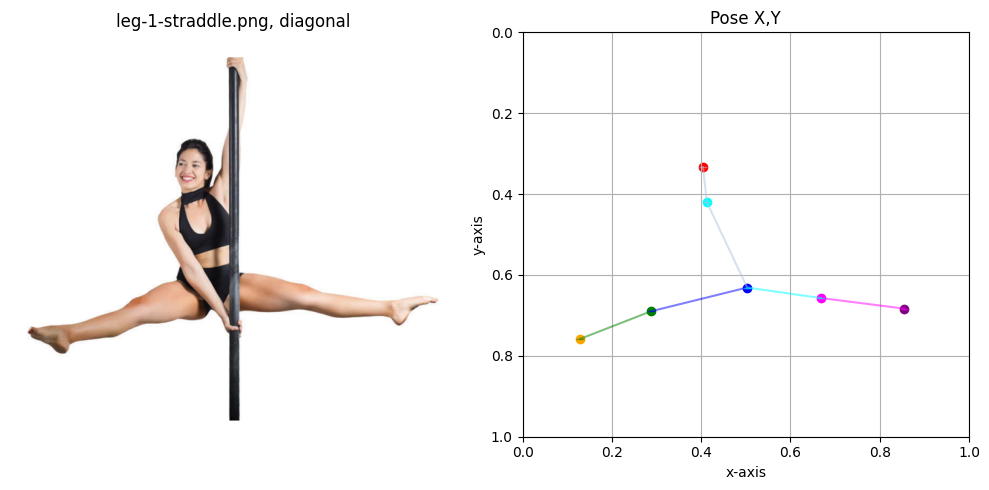

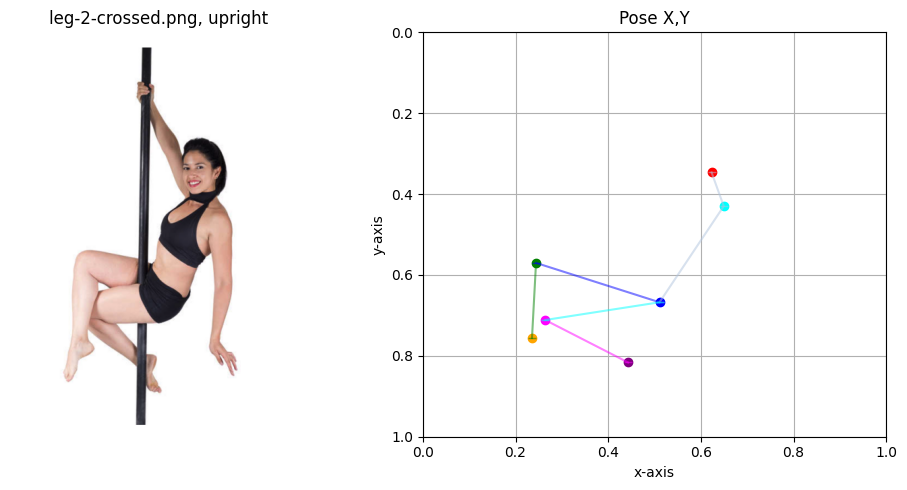

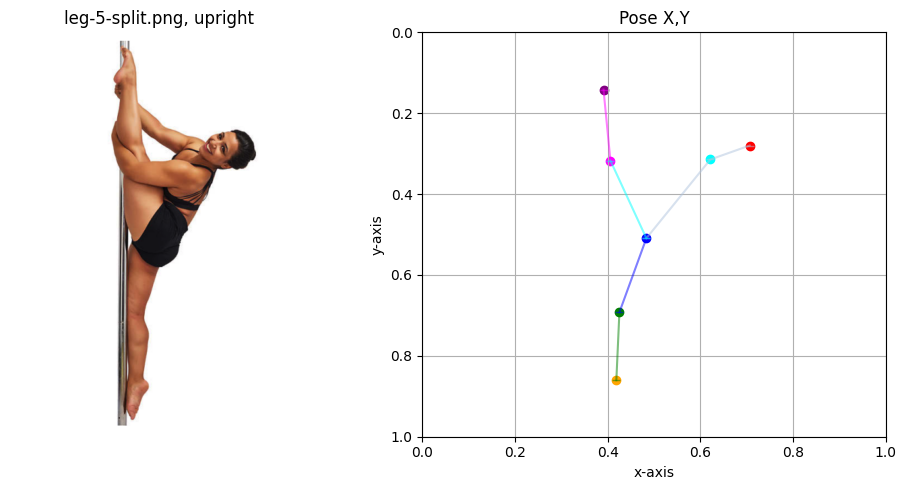

,filename,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,landmark_01_y,landmark_01_z,landmark_01_v,landmark_02_x,...,kneeR_y,footR_x,footR_y,kneeL_x,kneeL_y,footL_x,footL_y,category,name,orientation
0,data/external/source-ik/leg-1-straddle.png,0.397552,0.343427,-0.620723,0.999473,0.409310,0.325741,-0.604030,0.998491,0.416658,...,0.689844,0.129008,0.757925,0.668744,0.657098,0.854690,0.683173,leg,straddle,diagonal
1,data/external/source-ik/leg-2-crossed.png,0.608689,0.359034,-0.746402,0.999994,0.624136,0.340491,-0.749550,0.999991,0.633869,...,0.570215,0.235572,0.755826,0.264034,0.711384,0.442967,0.816387,leg,crossed,upright
2,data/external/source-ik/leg-5-split.png,0.684946,0.276191,-0.723765,0.992754,0.712195,0.279863,-0.734266,0.993775,0.714129,...,0.692359,0.418660,0.860284,0.405865,0.317194,0.390975,0.141513,leg,split,upright


In [21]:
from helpers.plotting import *

pose_data = pd.read_csv('results.csv')
poses = ['leg-1-straddle','leg-5-split','leg-2-crossed']
poses_pattern = '|'.join(poses)
pose_subset = pose_data[pose_data['filename'].str.contains(poses_pattern)].reset_index(drop=True)

for i in range(len(pose_subset)):
    plot_pose_dictionary_entry(pose_subset,i)

pose_subset

## Feature Engineering

1. First, we need to establish the connected joints based on human anatomy what is relevant. For example angle from head to chest might not be so important compared to head to hip - knee - foot flexibility.
2. We calculate the angles between connected joint. This is also to be able to know the minimum and maximum range of motion found in the training video.

In [23]:
df = pose_subset.copy()

In [26]:
def calculate_angle(df, x1_col, y1_col, x2_col, y2_col):
    angle = np.arctan2(df[x2_col] - df[y1_col], df[x2_col] - df[x1_col]) * 180 / np.pi
    return abs(angle)

def compute_connected_joints_angles(df):
    df['a_head_to_chest'] = calculate_angle(df, 'head_x', 'head_y', 'chest_x', 'chest_y')
    df['a_chest_to_hip'] = calculate_angle(df, 'chest_x', 'chest_y', 'hip_x', 'hip_y')
    df['a_right_shoulder_to_elbow'] = calculate_angle(df, 'landmark_12_x', 'landmark_12_y', 'landmark_14_x', 'landmark_14_y')
    df['a_right_elbow_to_wrist'] = calculate_angle(df, 'landmark_14_x', 'landmark_14_y', 'landmark_16_x', 'landmark_16_y')
    df['a_right_hip_to_knee'] = calculate_angle(df, 'landmark_24_x', 'landmark_24_y', 'landmark_26_x', 'landmark_26_y')
    df['a_right_knee_to_foot'] = calculate_angle(df, 'landmark_26_x', 'landmark_26_y', 'landmark_28_x', 'landmark_28_y')
    df['a_left_shoulder_to_elbow'] = calculate_angle(df, 'landmark_11_x', 'landmark_11_y', 'landmark_13_x', 'landmark_13_y')
    df['a_left_elbow_to_wrist'] = calculate_angle(df, 'landmark_13_x', 'landmark_13_y', 'landmark_15_x', 'landmark_15_y')
    df['a_left_hip_to_knee'] = calculate_angle(df, 'landmark_23_x', 'landmark_23_y', 'landmark_25_x', 'landmark_25_y')
    df['a_left_knee_to_foot'] = calculate_angle(df, 'landmark_25_x', 'landmark_25_y', 'landmark_27_x', 'landmark_27_y')
    return df

new_df = compute_connected_joints_angles(df)
new_df

,filename,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,landmark_01_y,landmark_01_z,landmark_01_v,landmark_02_x,...,a_head_to_chest,a_chest_to_hip,a_right_shoulder_to_elbow,a_right_elbow_to_wrist,a_right_hip_to_knee,a_right_knee_to_foot,a_left_shoulder_to_elbow,a_left_elbow_to_wrist,a_left_hip_to_knee,a_left_knee_to_foot
0,data/external/source-ik/leg-1-straddle.png,0.397552,0.343427,-0.620723,0.999473,0.409310,0.325741,-0.604030,0.998491,0.416658,...,83.797094,42.621048,29.850173,62.461614,110.949986,105.795001,72.460097,88.157675,12.805524,46.739188
1,data/external/source-ik/leg-2-crossed.png,0.608689,0.359034,-0.746402,0.999994,0.624136,0.340491,-0.749550,0.999991,0.633869,...,85.044942,149.713494,114.890027,110.853048,121.365257,91.485031,84.998762,115.256282,121.444311,56.311518
2,data/external/source-ik/leg-5-split.png,0.684946,0.276191,-0.723765,0.992754,0.712195,0.279863,-0.734266,0.993775,0.714129,...,103.947358,129.236748,131.550708,114.949950,128.857654,91.378088,163.828903,107.943241,126.877686,101.410166


In [46]:
selected_columns = ['filename', 'orientation'] + [col for col in new_df.columns if col.startswith('a_')]
new_df[selected_columns]

,filename,orientation,a_head_to_chest,a_chest_to_hip,a_right_shoulder_to_elbow,a_right_elbow_to_wrist,a_right_hip_to_knee,a_right_knee_to_foot,a_left_shoulder_to_elbow,a_left_elbow_to_wrist,a_left_hip_to_knee,a_left_knee_to_foot
0,data/external/source-ik/leg-1-straddle.png,diagonal,83.797094,42.621048,29.850173,62.461614,110.949986,105.795001,72.460097,88.157675,12.805524,46.739188
1,data/external/source-ik/leg-2-crossed.png,upright,85.044942,149.713494,114.890027,110.853048,121.365257,91.485031,84.998762,115.256282,121.444311,56.311518
2,data/external/source-ik/leg-5-split.png,upright,103.947358,129.236748,131.550708,114.949950,128.857654,91.378088,163.828903,107.943241,126.877686,101.410166


In [43]:
def plot_joint_motion(df, joint_name, ax):
    angles = np.deg2rad(df[joint_name])  # Convert angles to radians
    ax.hist(angles, bins=36, density=True, alpha=0.6)
    ax.set_title(joint_name.replace('_', ' ').title())

def polar_plot_pose_dictionary_entry(df, index):
    row = df.iloc[index]
    
    filename = row['filename']
    basename = os.path.basename(filename)
    plot_title = str(basename) + ", " + row['orientation']
    
    fig, axs = plt.subplots(3, 3, subplot_kw=dict(polar=True), figsize=(15, 15))
    
    fig.suptitle(plot_title, fontsize=16)
    
    plot_joint_motion(df, 'a_head_to_chest', axs[0, 0])
    plot_joint_motion(df, 'a_chest_to_hip', axs[0, 1])
    plot_joint_motion(df, 'a_right_shoulder_to_elbow', axs[0, 2])
    plot_joint_motion(df, 'a_right_elbow_to_wrist', axs[1, 0])
    plot_joint_motion(df, 'a_right_hip_to_knee', axs[1, 1])
    plot_joint_motion(df, 'a_right_knee_to_foot', axs[1, 2])
    plot_joint_motion(df, 'a_left_shoulder_to_elbow', axs[2, 0])
    plot_joint_motion(df, 'a_left_elbow_to_wrist', axs[2, 1])
    plot_joint_motion(df, 'a_left_hip_to_knee', axs[2, 2])
    plt.subplots_adjust(top=0.85)

    plt.tight_layout()
    plt.show()

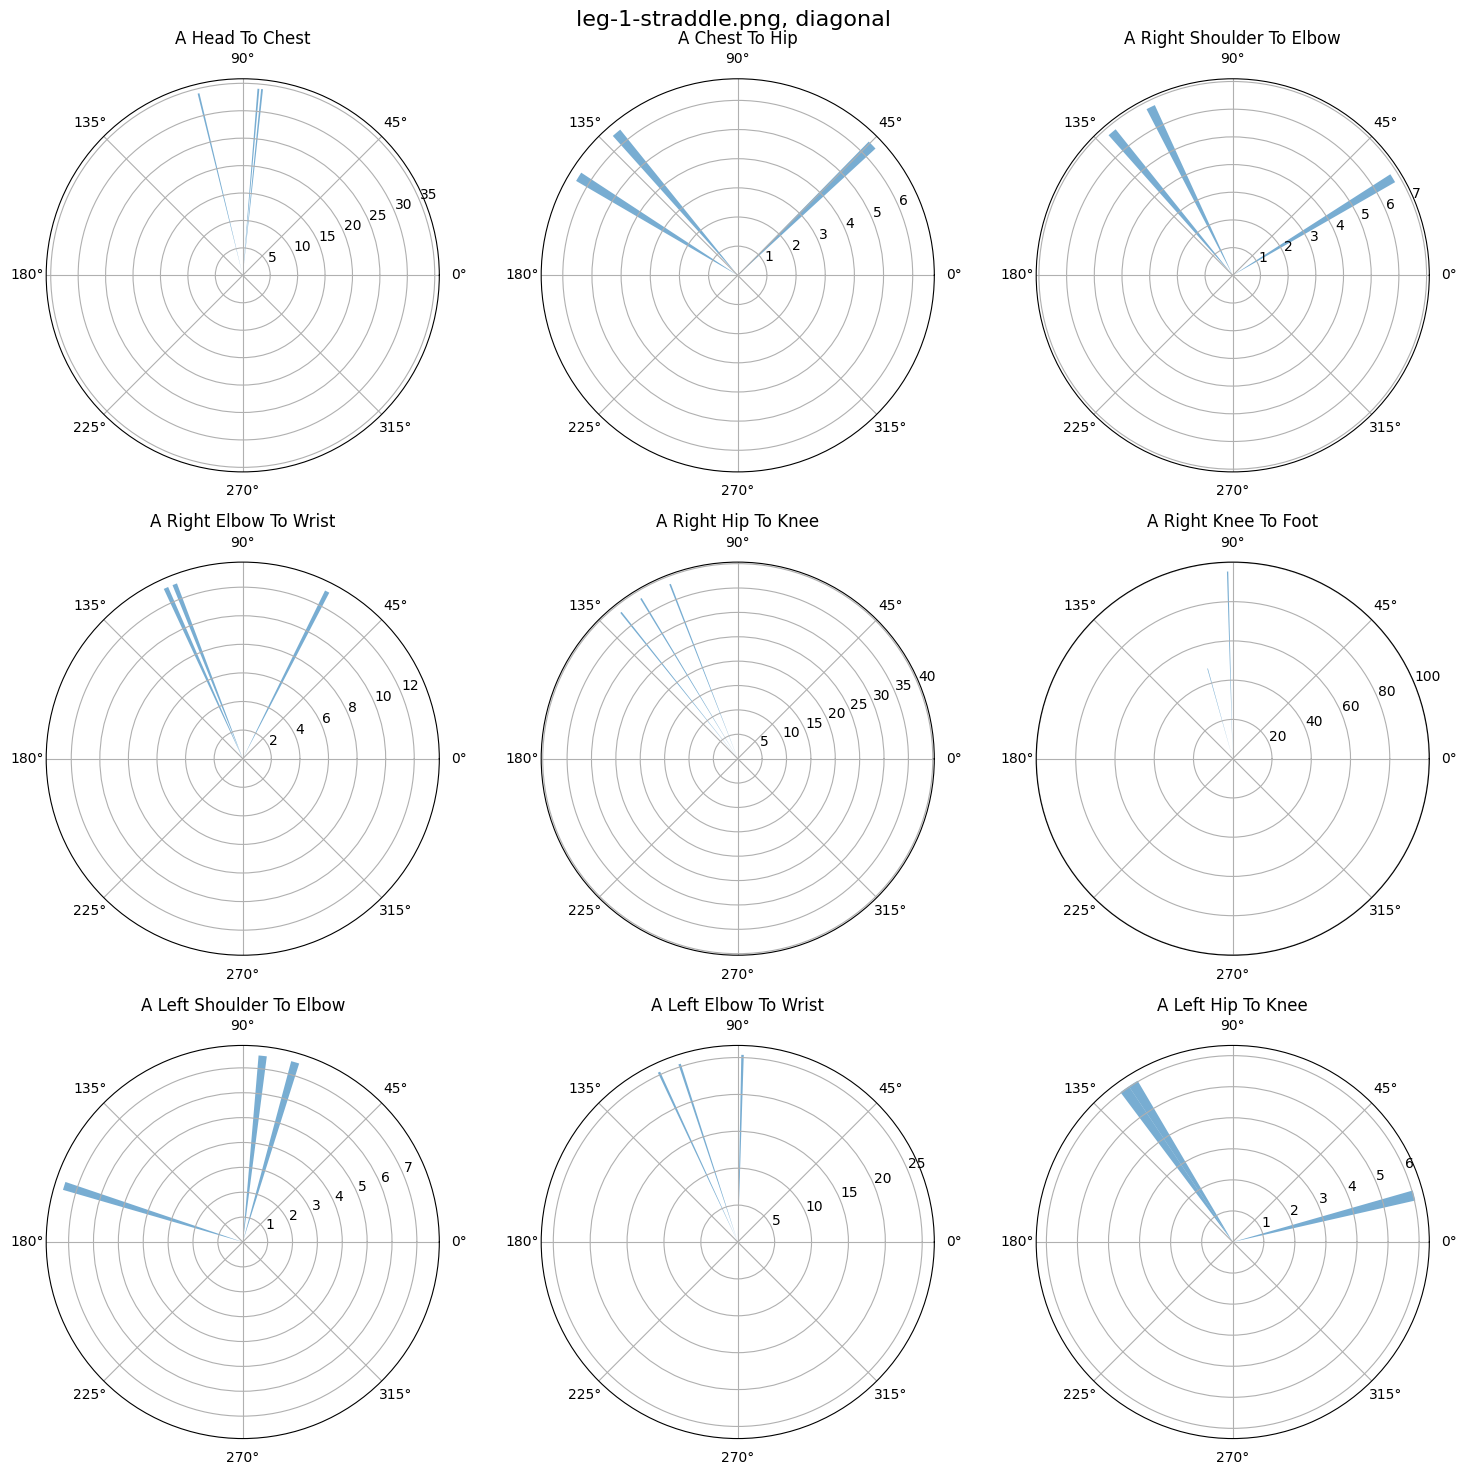

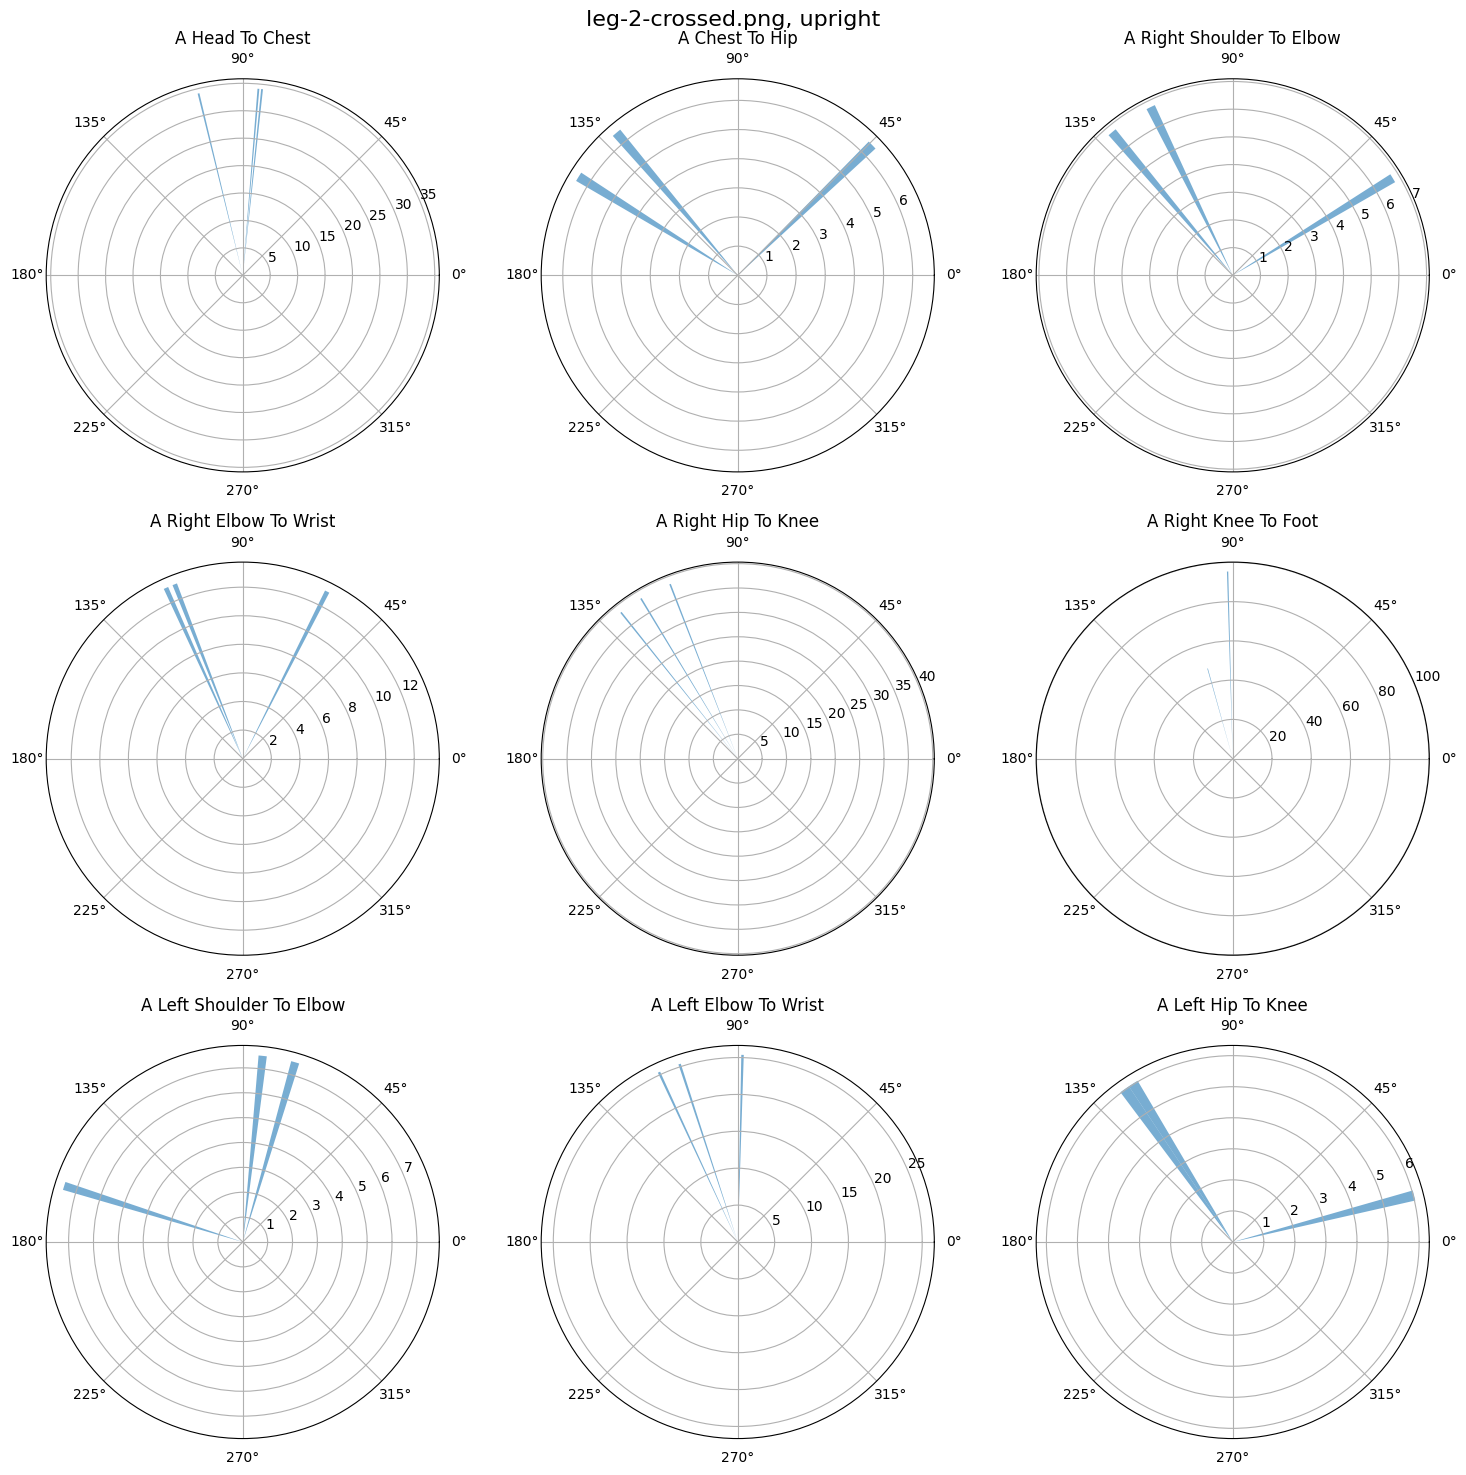

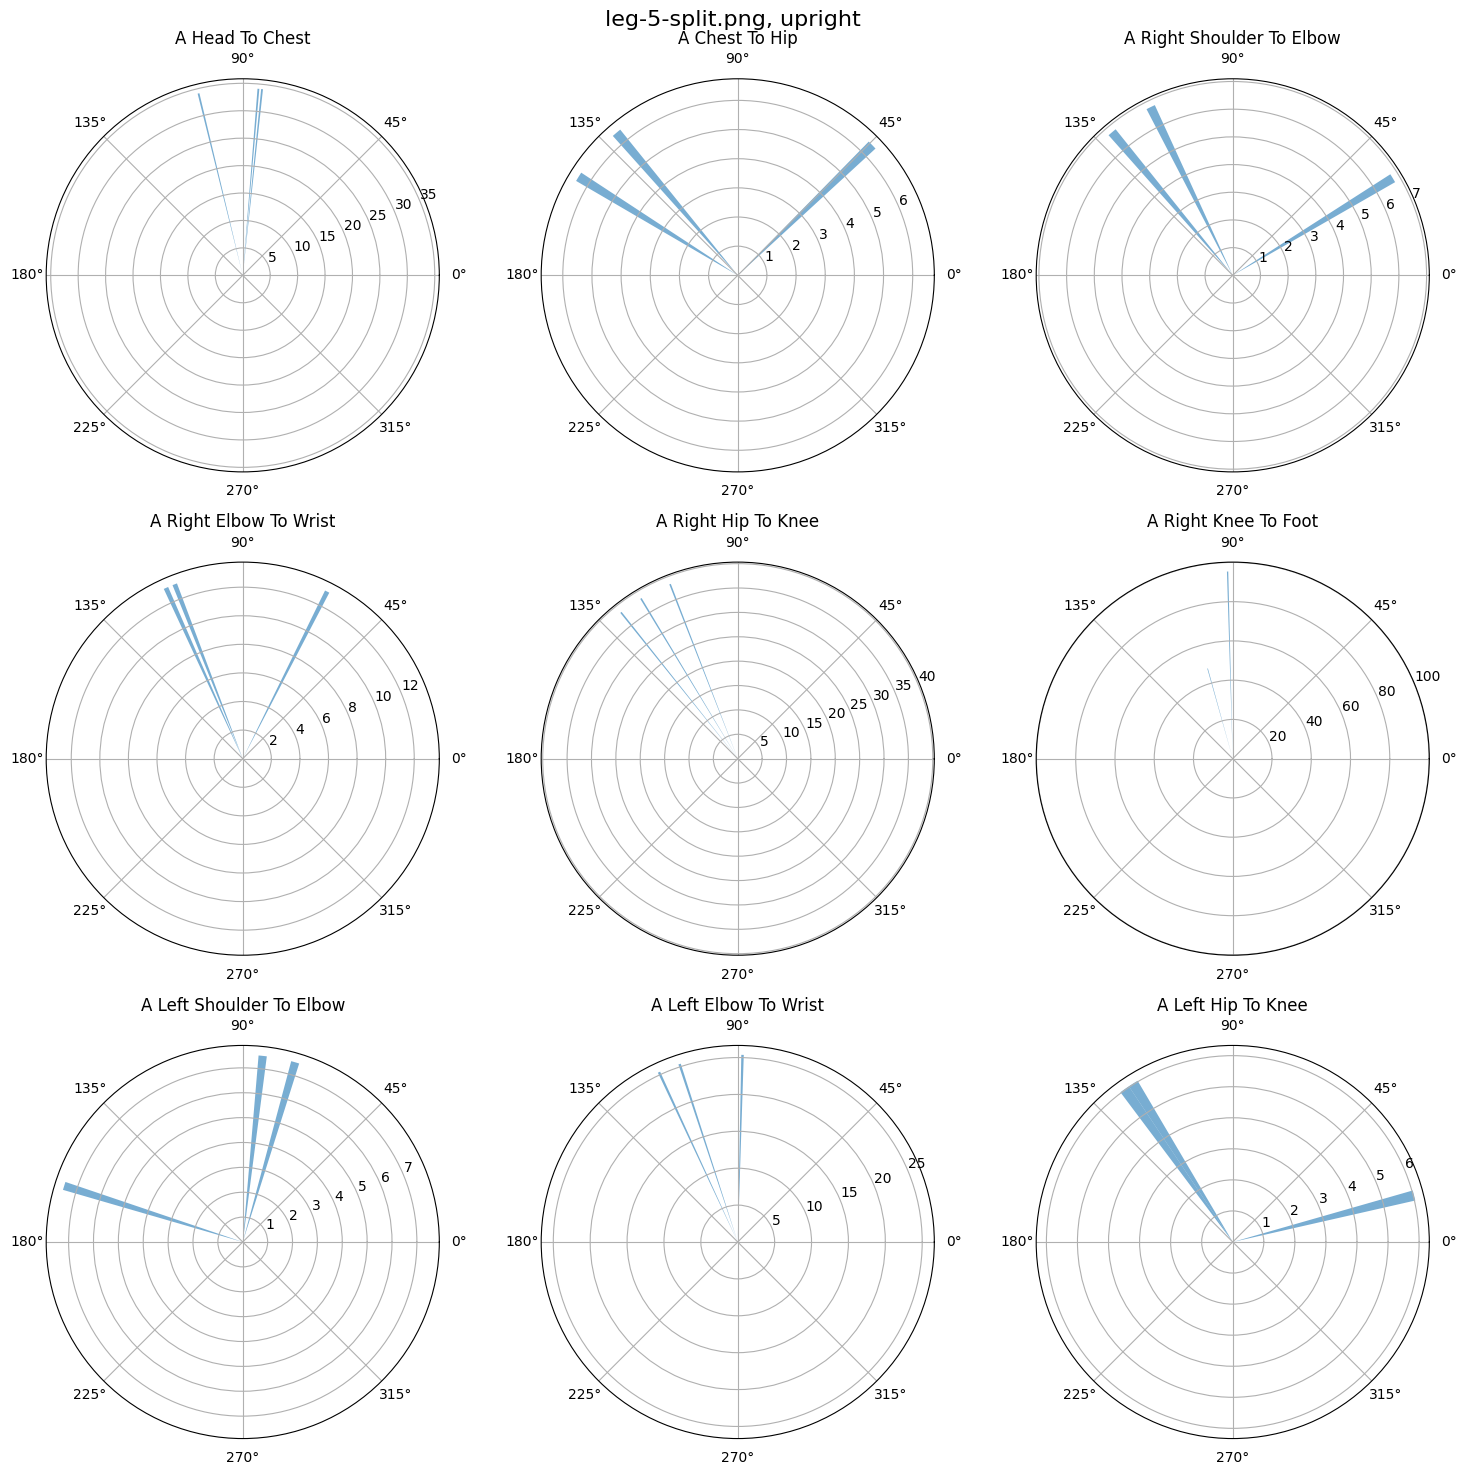

In [44]:
for i in range(len(df)):
    polar_plot_pose_dictionary_entry(df, i)

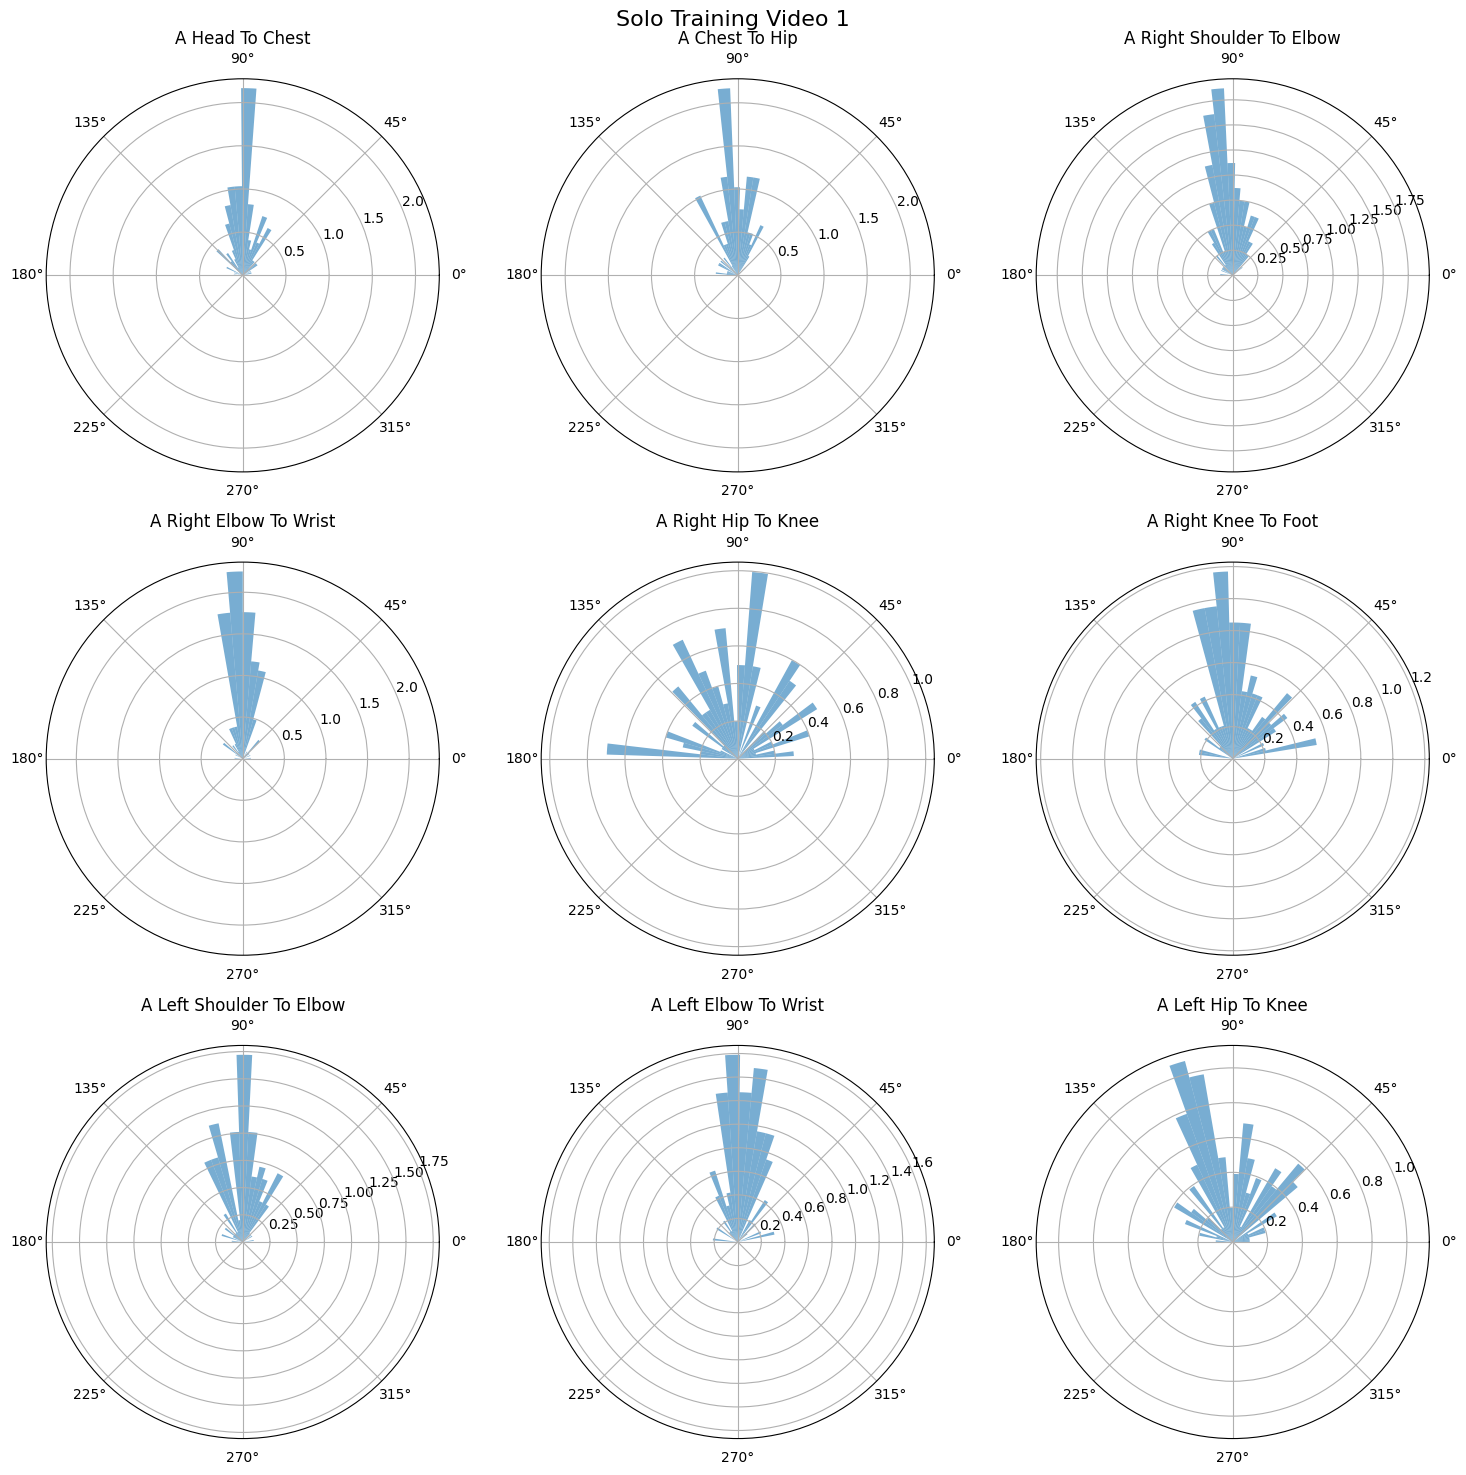

In [45]:
user_df = pd.read_csv('data/processed/solo-training1/results.csv')
user_df2 = compute_connected_joints_angles(user_df)

def polar_plot_full_choreography(df, title):
    fig, axs = plt.subplots(3, 3, subplot_kw=dict(polar=True), figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    plot_joint_motion(df, 'a_head_to_chest', axs[0, 0])
    plot_joint_motion(df, 'a_chest_to_hip', axs[0, 1])
    plot_joint_motion(df, 'a_right_shoulder_to_elbow', axs[0, 2])
    plot_joint_motion(df, 'a_right_elbow_to_wrist', axs[1, 0])
    plot_joint_motion(df, 'a_right_hip_to_knee', axs[1, 1])
    plot_joint_motion(df, 'a_right_knee_to_foot', axs[1, 2])
    plot_joint_motion(df, 'a_left_shoulder_to_elbow', axs[2, 0])
    plot_joint_motion(df, 'a_left_elbow_to_wrist', axs[2, 1])
    plot_joint_motion(df, 'a_left_hip_to_knee', axs[2, 2])
    plt.subplots_adjust(top=0.85)

    plt.tight_layout()
    plt.show()
    
polar_plot_full_choreography(user_df2, "Solo Training Video 1")

## Resources

* https://www.goodreads.com/en/book/show/1530924